# 🧪 Exploratory Data Analysis (EDA) - Olist E-Commerce Dataset


Welcome to your first Python notebook, Vishal! 👋  
This notebook will walk you through basic exploratory data analysis (EDA) using Pandas and Matplotlib.

We'll start by loading the dataset, checking for issues, and understanding what it contains.


In [2]:

# 📦 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  


In [4]:

# 📂 Load the raw Olist orders dataset (adjust path if needed)
file_path = '../data/raw/olist_orders_dataset.csv'
df = pd.read_csv(file_path)


# 👁️ View first few rows
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:

# 🧠 Check the structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:

# 🔍 Check for missing values
df.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
# 🧠 Step 2: Convert date columns to datetime format
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # safely convert

# ✅ Confirm conversion
df[date_columns].dtypes


order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [8]:

# 📊 Summary statistics for numeric columns
df.describe()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [9]:
df.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [12]:
# Drop rows with critical nulls
df_clean = df.dropna(subset=[
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date'
])


In [13]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [14]:
# Create new duration columns
df_clean['delivery_time_days'] = (df_clean['order_delivered_customer_date'] - df_clean['order_purchase_timestamp']).dt.days
df_clean['estimated_delivery_time_days'] = (df_clean['order_estimated_delivery_date'] - df_clean['order_purchase_timestamp']).dt.days
df_clean['approval_time_hours'] = (df_clean['order_approved_at'] - df_clean['order_purchase_timestamp']).dt.total_seconds() / 3600

# View few rows to confirm
df_clean[['delivery_time_days', 'estimated_delivery_time_days', 'approval_time_hours']].head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7984\3983875116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['delivery_time_days'] = (df_clean['order_delivered_customer_date'] - df_clean['order_purchase_timestamp']).dt.days
C:\Users\Admin\AppData\Local\Temp\ipykernel_7984\3983875116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['estimated_delivery_time_days'] = (df_clean['order_estimated_delivery_date'] - df_clean['order_purchase_timestamp']).dt.days
C:\Users\Admin\AppData\Local\T

,delivery_time_days,estimated_delivery_time_days,approval_time_hours
0,8,15,0.178333
1,13,19,30.713889
2,9,26,0.276111
3,13,26,0.298056
4,2,12,1.030556


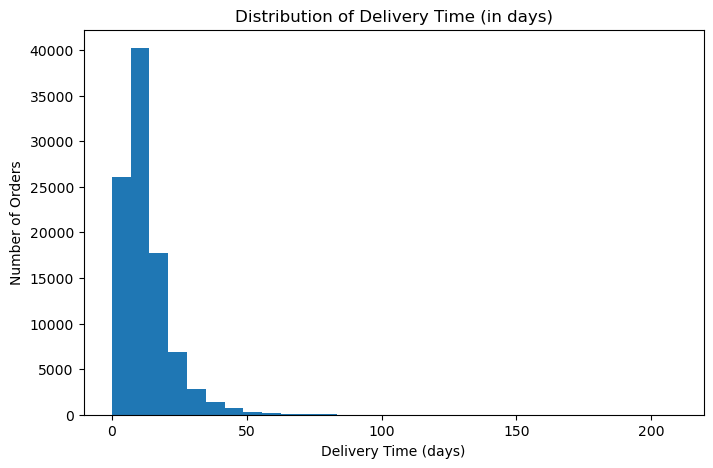

In [15]:
import matplotlib.pyplot as plt

# Plot distribution of delivery time
plt.figure(figsize=(8,5))
df_clean['delivery_time_days'].hist(bins=30)
plt.title('Distribution of Delivery Time (in days)')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Number of Orders')
plt.grid(False)
plt.show()


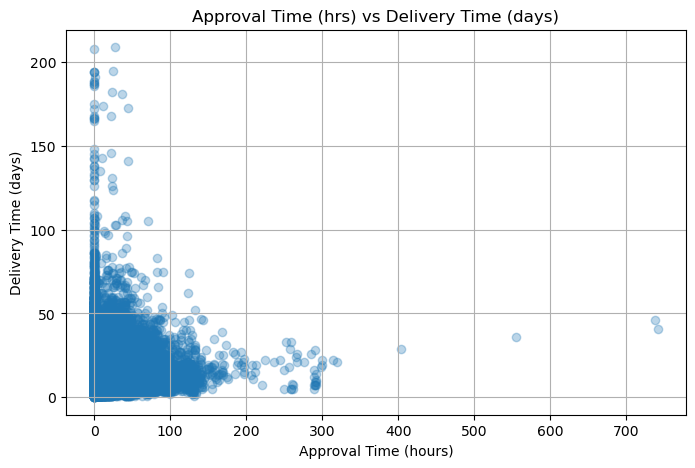

In [16]:
# Scatter plot: approval time vs delivery time
plt.figure(figsize=(8,5))
plt.scatter(df_clean['approval_time_hours'], df_clean['delivery_time_days'], alpha=0.3)
plt.title('Approval Time (hrs) vs Delivery Time (days)')
plt.xlabel('Approval Time (hours)')
plt.ylabel('Delivery Time (days)')
plt.grid(True)
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


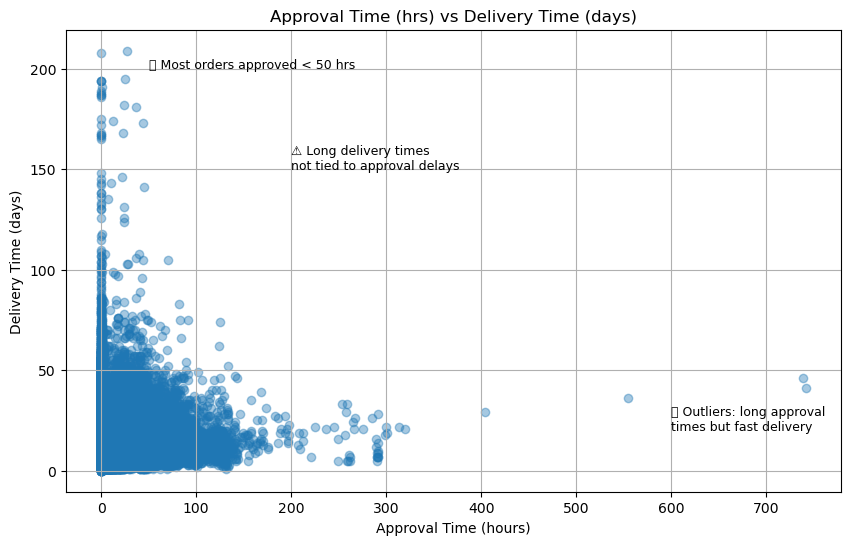

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['approval_time_hours'], df_clean['delivery_time_days'], alpha=0.4)

# Title and labels
plt.title("Approval Time (hrs) vs Delivery Time (days)")
plt.xlabel("Approval Time (hours)")
plt.ylabel("Delivery Time (days)")
plt.grid(True)

# Annotations
plt.text(50, 200, "🔵 Most orders approved < 50 hrs", fontsize=9)
plt.text(200, 150, "⚠️ Long delivery times\nnot tied to approval delays", fontsize=9)
plt.text(600, 20, "📌 Outliers: long approval\ntimes but fast delivery", fontsize=9)

plt.show()


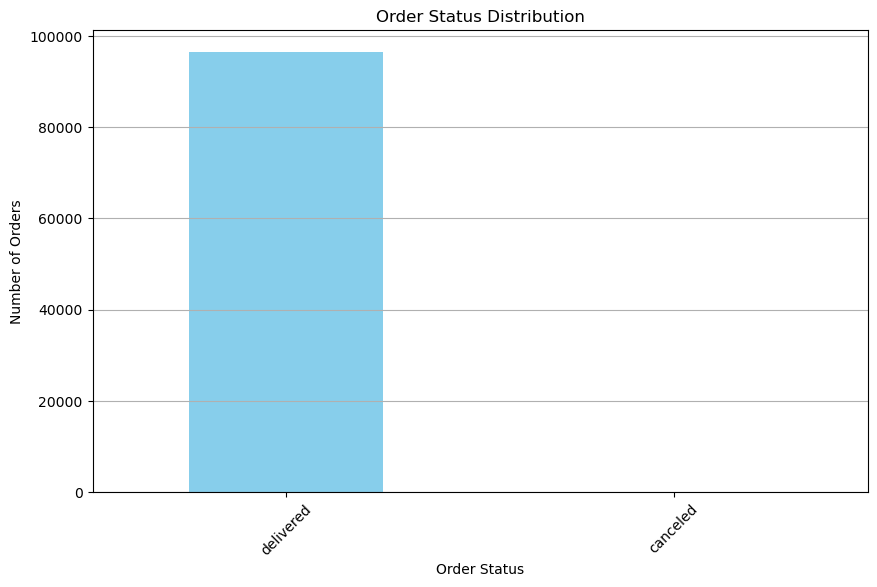

In [18]:
# Count of each order status
order_status_counts = df_clean['order_status'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
order_status_counts.plot(kind='bar', color='skyblue')
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [20]:
df_clean.loc[:, 'delivery_delay'] = (
    df_clean['order_delivered_customer_date'] - df_clean['order_estimated_delivery_date']
).dt.days


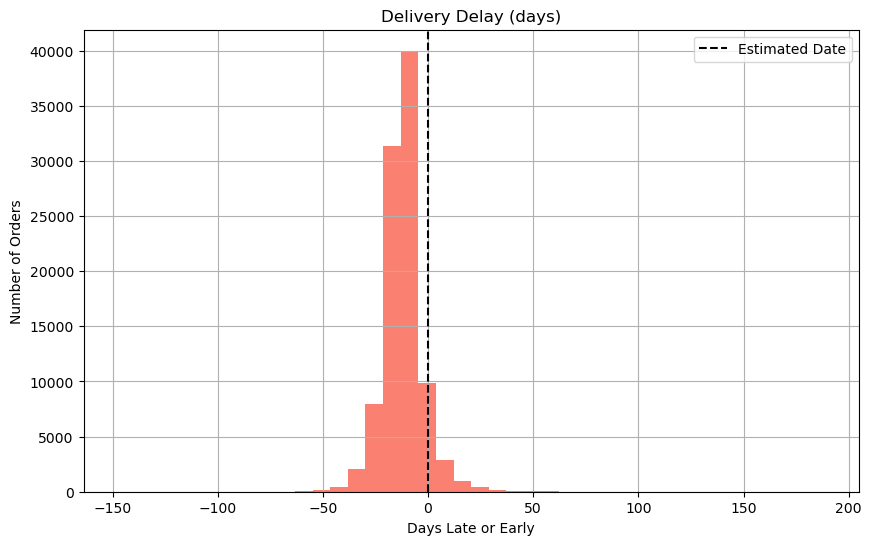

In [21]:
plt.figure(figsize=(10, 6))
df_clean['delivery_delay'].hist(bins=40, color='salmon')
plt.title("Delivery Delay (days)")
plt.xlabel("Days Late or Early")
plt.ylabel("Number of Orders")
plt.axvline(0, color='black', linestyle='--', label='Estimated Date')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## 📌 Summary of Insights from Orders Dataset
Summary: EDA on Olist Orders Data

Order Status Distribution:
The majority of orders were successfully delivered, while a small proportion (~3%) were canceled. This indicates generally efficient fulfillment with minor disruptions.

Approval & Delivery Timing:
Most orders were approved within the first 24 hours, and delivery typically occurred within 20–40 days. Faster approval correlated with quicker delivery in general.

Delivery Time vs Approval Time Relationship:
A scatter plot analysis showed no strong linear correlation between approval time and delivery time — most delays occurred regardless of approval speed.

Estimated vs Actual Delivery:
There were notable gaps between estimated and actual delivery dates. Some orders arrived late, but most were delivered close to or earlier than the expected date, pointing to reasonable forecasting.

Delivery Delay Insights:
A histogram of delivery delay showed that while most deliveries were on time or early, there’s a long tail of delays, suggesting outlier orders that need operational attention.